In [1]:
import pandas as pd
import os

output_directory = 'attr_summary_plots'
os.makedirs(output_directory, exist_ok=True)

df = pd.read_csv('Philadelphia_Veg_data.csv')

#Defining this function to get the counts for attributes
def summarize_attributes(df):
    df_attributes = df['attributes'].str.split(', ', expand=True)
    df_stacked = df_attributes.stack()
    attribute_counts = df_stacked.value_counts()
    
    return attribute_counts

all_attribute_counts = summarize_attributes(df)
print(all_attribute_counts) #All attributes

'validated': False                      233
'valet': False}"                        225
'RestaurantsTakeOut': 'True'            219
'lot': False                            218
'BusinessAcceptsCreditCards': 'True'    216
                                       ... 
u'dessert': None}"}                       1
'karaoke': None}"                         1
'Ambience': "{u'divey': True              1
u'tuesday': True                          1
'GoodForMeal': 'None'}                    1
Name: count, Length: 322, dtype: int64


In [2]:

#For summarizing attributes in Shiny app
#Did not end up being useful. No useful generalizations can be made.
def summarize_attributes(df, count_threshold=3):
    if 'attributes' in df.columns:
        df_attributes = df['attributes'].str.split(', ', expand=True)
        df_stacked = df_attributes.stack()
        attribute_counts = df_stacked.value_counts()
        
        filtered_attributes = attribute_counts[attribute_counts > count_threshold]
    
        return filtered_attributes
    else:
        return pd.Series() 

business_count_by_postal_code = df['postal_code'].value_counts()
filtered_business_count = business_count_by_postal_code[business_count_by_postal_code >= 5] #Only areas that have >=5 restaurants were considered

for postal_code in filtered_business_count.index:
    filtered_df = df[df['postal_code'] == postal_code]
    postal_code_filtered_attributes = summarize_attributes(filtered_df)

    print(f"Postal Code: {postal_code}")
    if not postal_code_filtered_attributes.empty:
        print(postal_code_filtered_attributes)
    else:
        print("No attributes found.")
    print("\n")

Postal Code: 19147
'validated': False                       36
'RestaurantsTakeOut': 'True'             35
'lot': False                             35
'BusinessParking': "{'garage': False     34
'valet': False}"                         34
                                         ..
'Alcohol': "'full_bar'"                   4
'GoodForKids': 'False'                    4
'HappyHour': 'False'                      4
'BusinessAcceptsCreditCards': 'False'     4
'BYOBCorkage': "'no'"                     4
Name: count, Length: 68, dtype: int64


Postal Code: 19107
'BusinessAcceptsCreditCards': 'True'    29
'validated': False                      28
'lot': False                            28
'RestaurantsTakeOut': 'True'            27
'upscale': False                        26
'valet': False}"                        26
'divey': False                          25
'intimate': False                       25
'BusinessParking': "{'garage': False    23
'RestaurantsDelivery': 'True'           23
'classy'

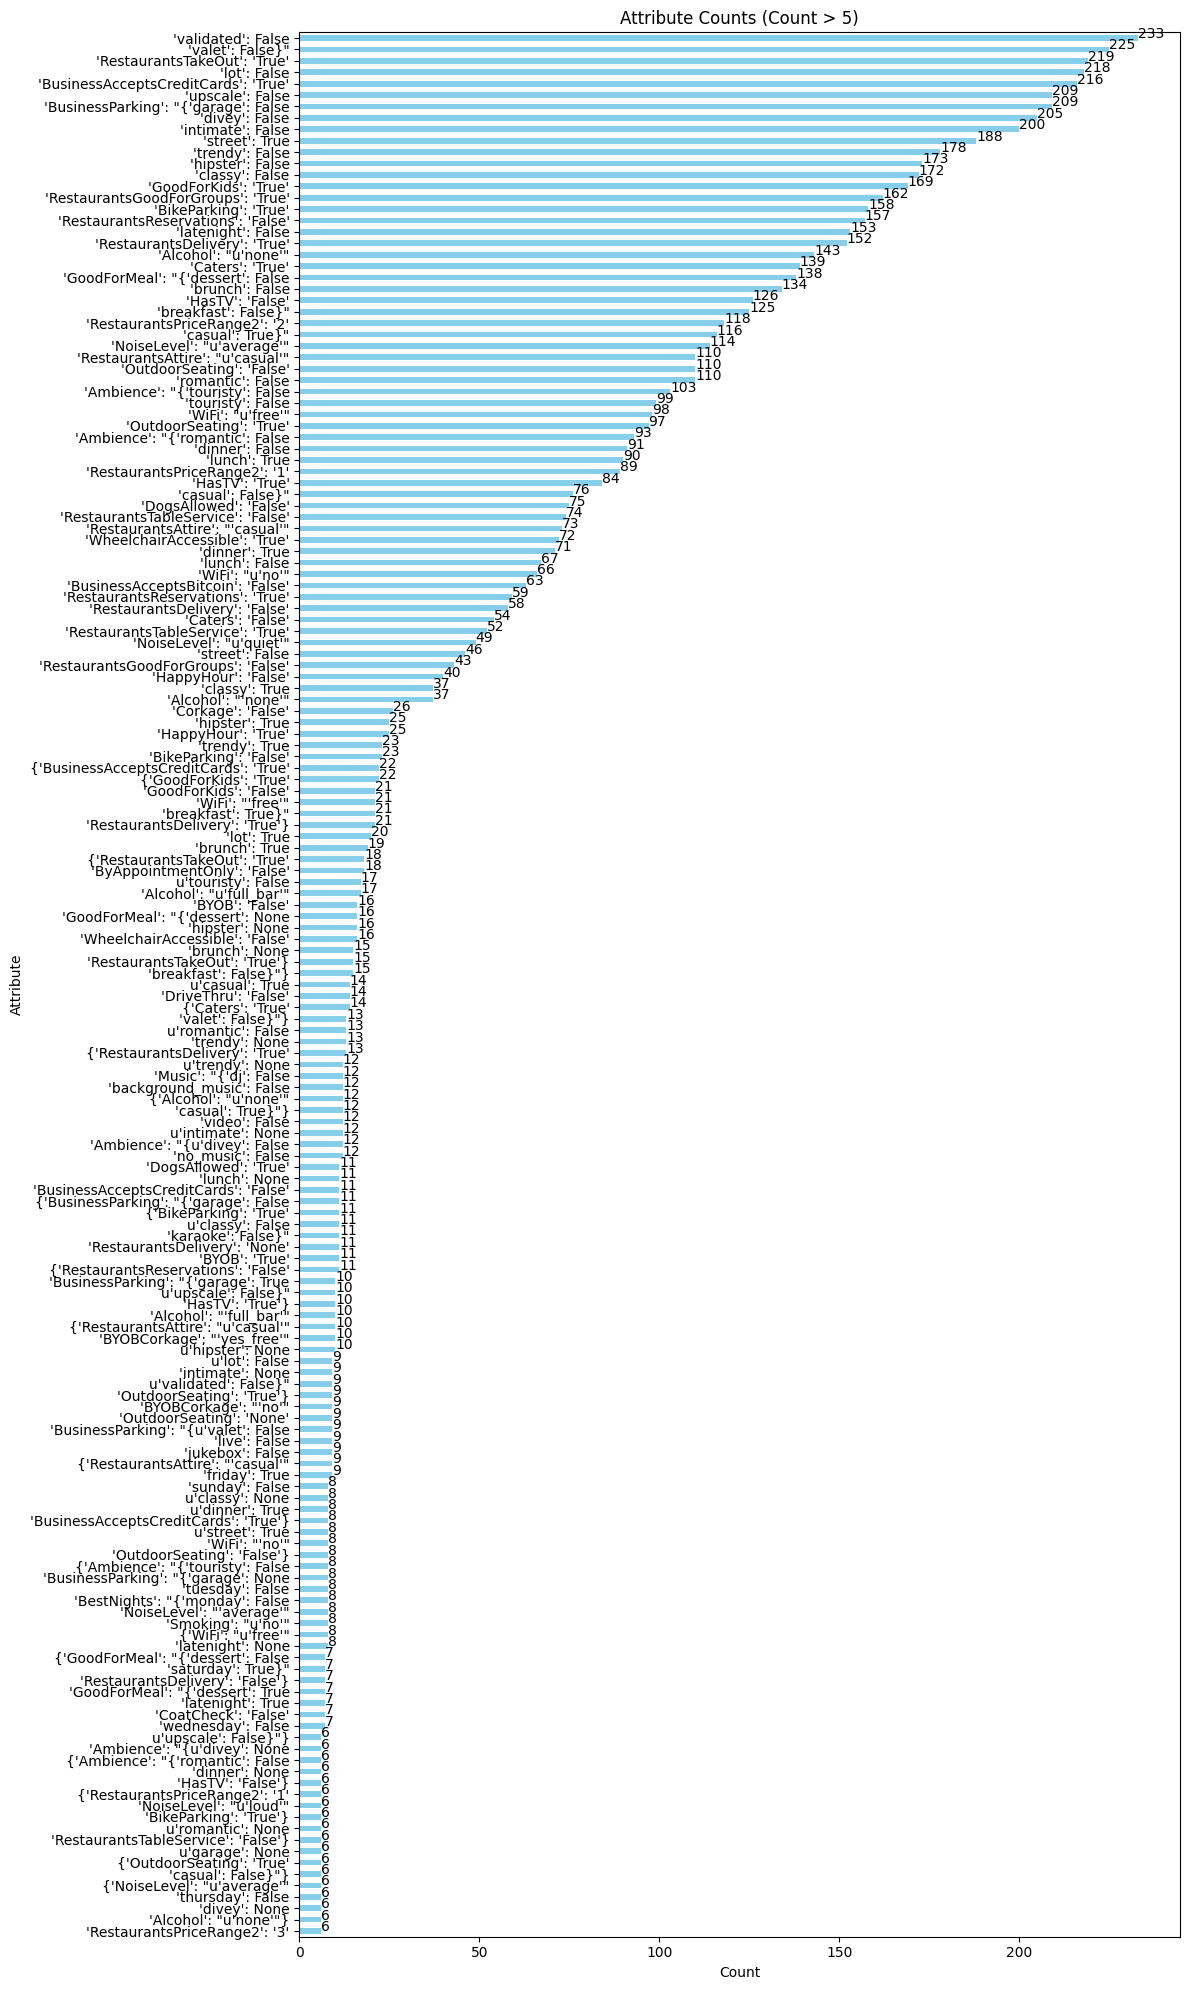

In [3]:
#Visualizations to summarize the attributes based on stars
#Did not use them for anything.

import matplotlib.pyplot as plt
all_attribute_counts = summarize_attributes(df)

min_count = 5 #Minimum Attribute count
filtered_attribute_counts = all_attribute_counts[all_attribute_counts > min_count]

plt.figure(figsize=(12, 20))
bar_plot = filtered_attribute_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title(f'Attribute Counts (Count > {min_count})')
plt.xlabel('Count')
plt.ylabel('Attribute')

for index, value in enumerate(filtered_attribute_counts.sort_values()):
    bar_plot.text(value, index, str(value))

plt.tight_layout()
plt.savefig(os.path.join(output_directory, 'attr_all_Counts.png'))
plt.show()

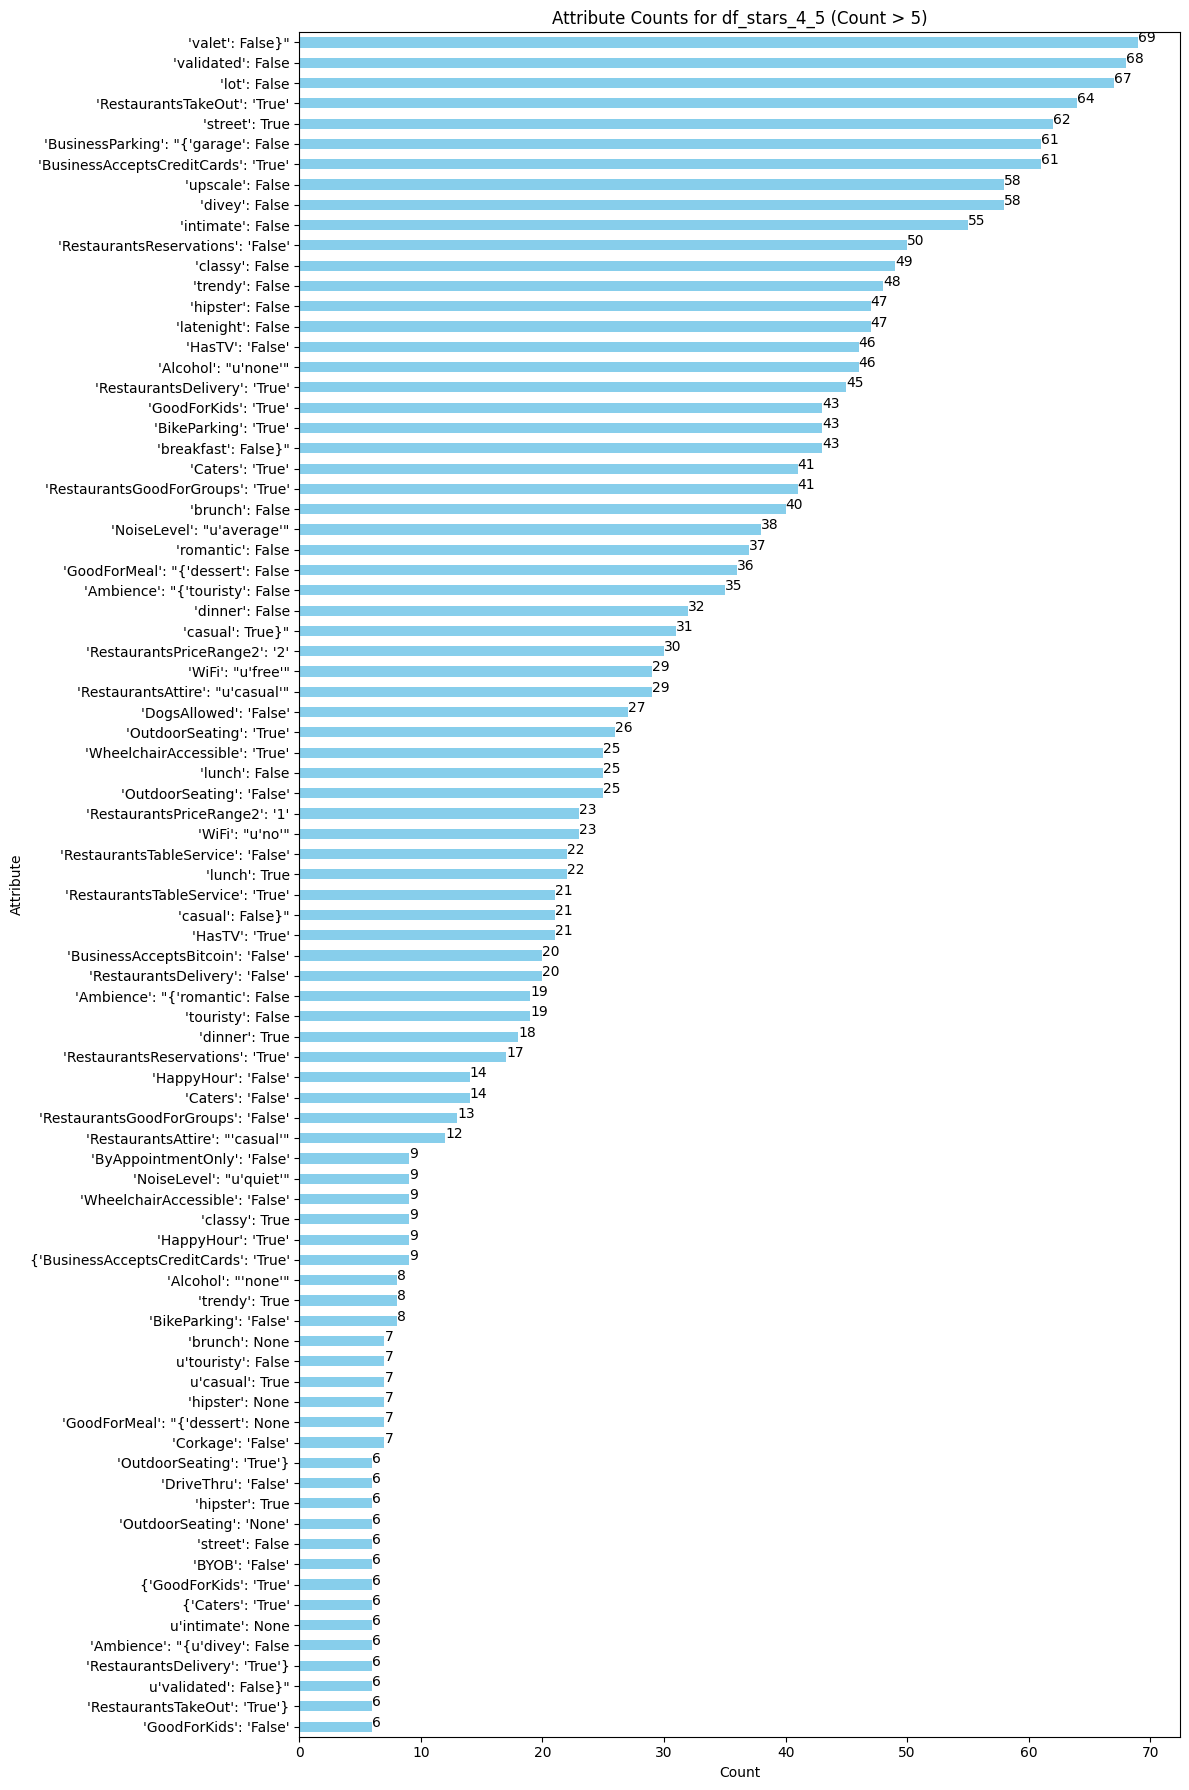

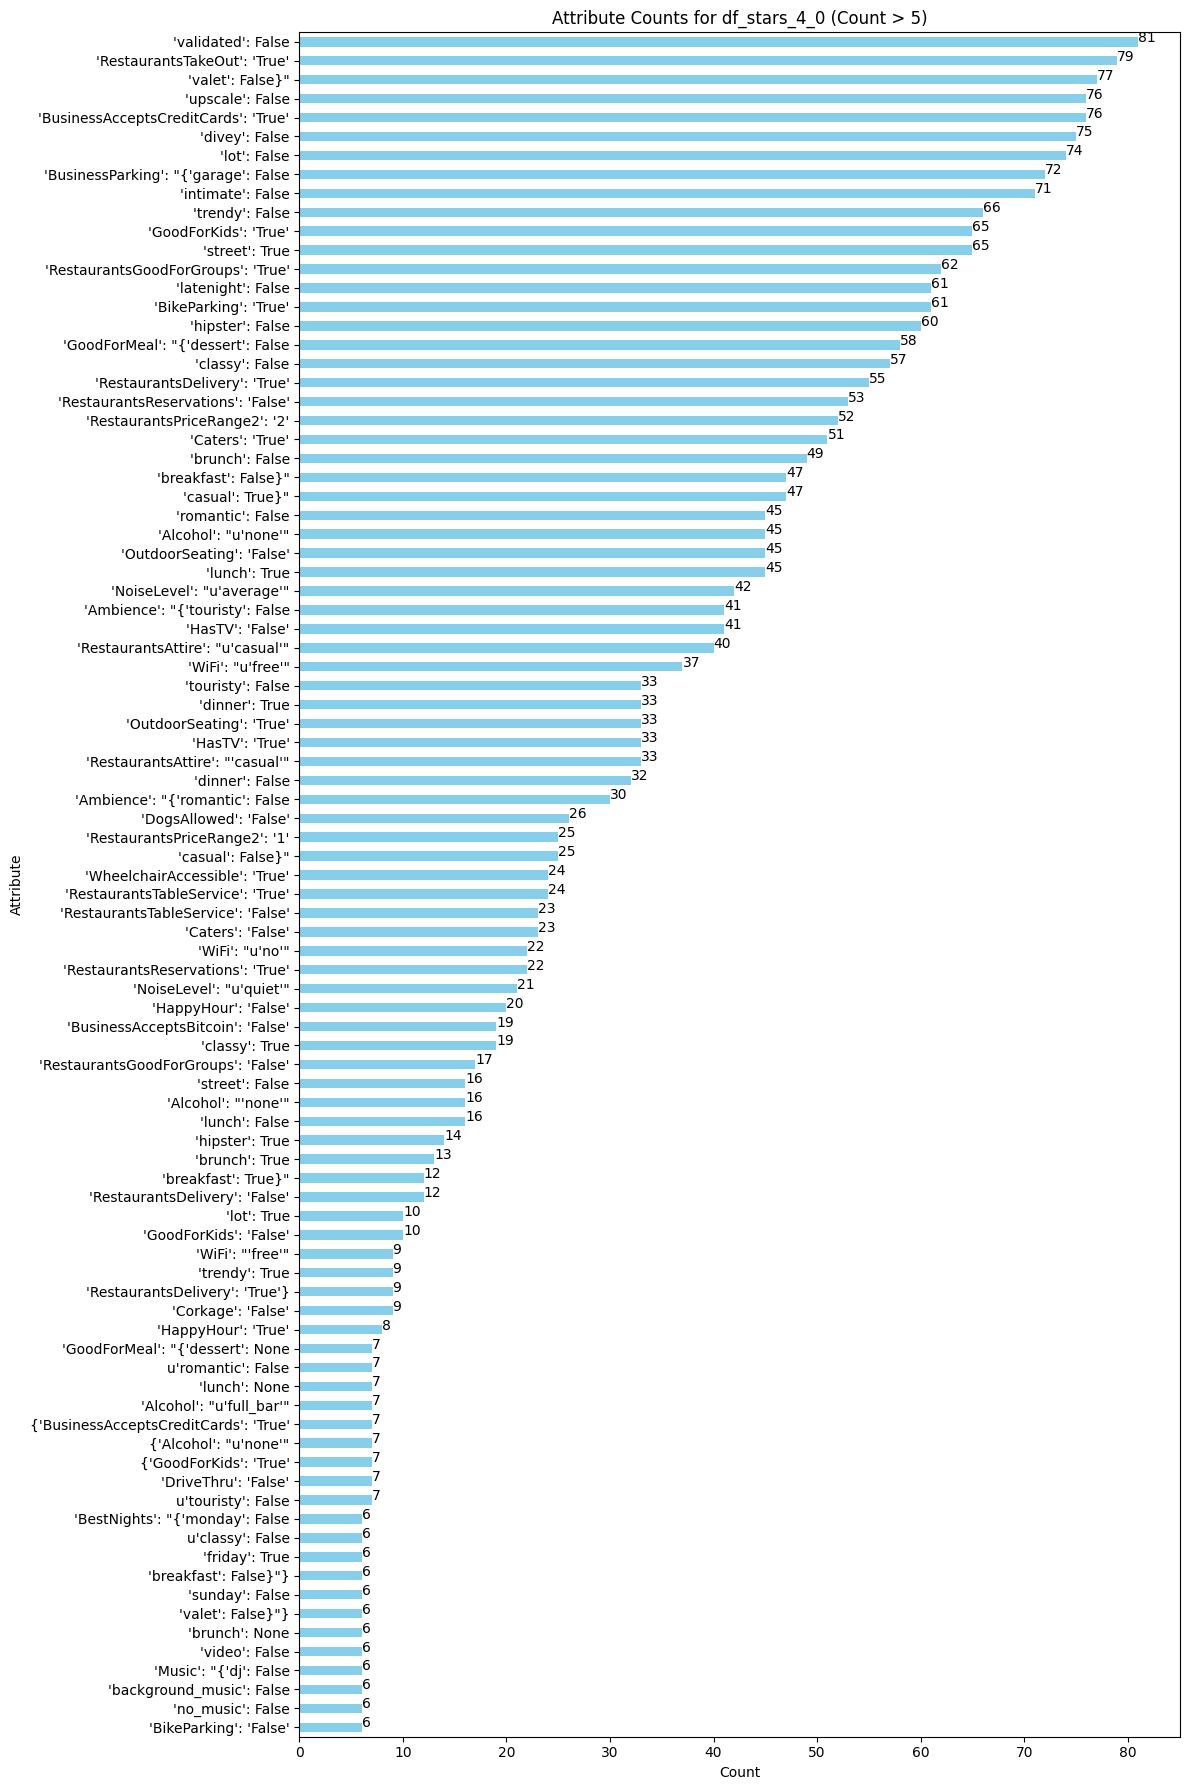

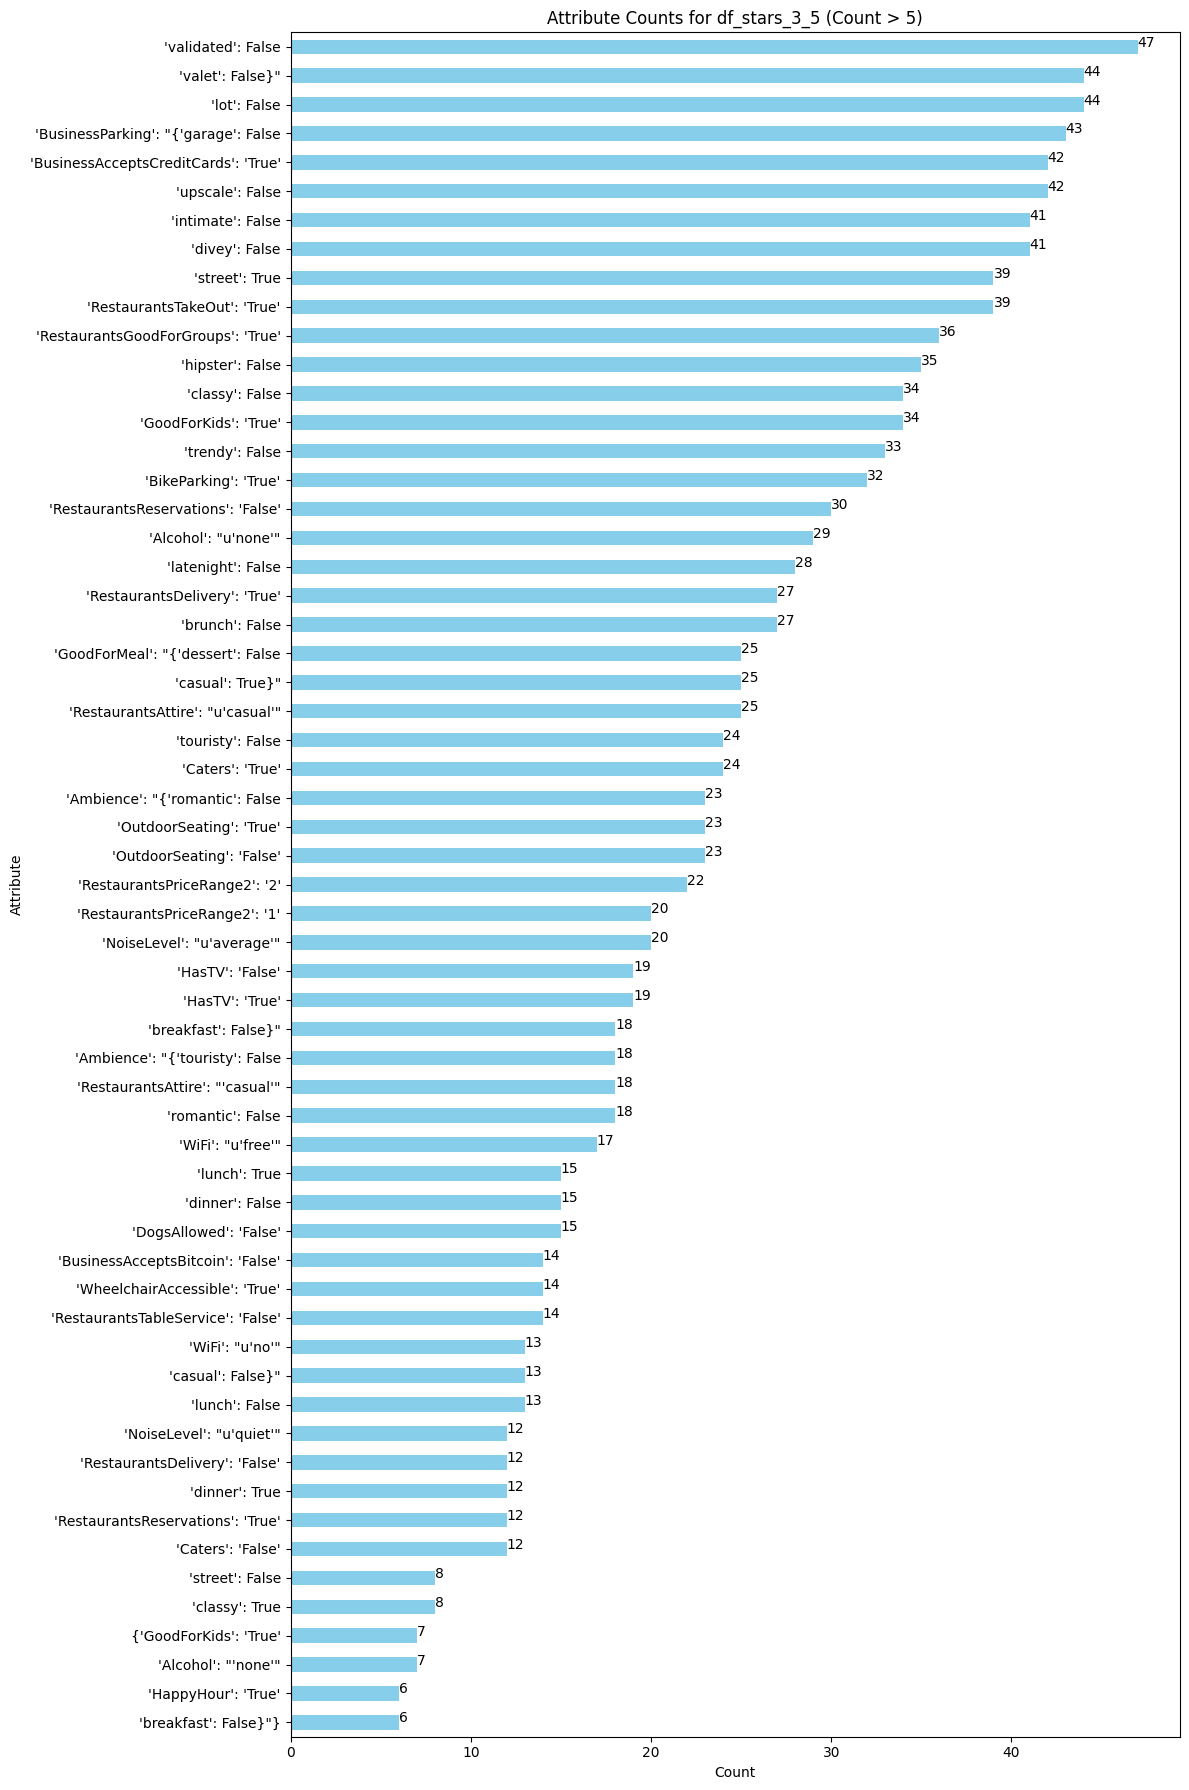

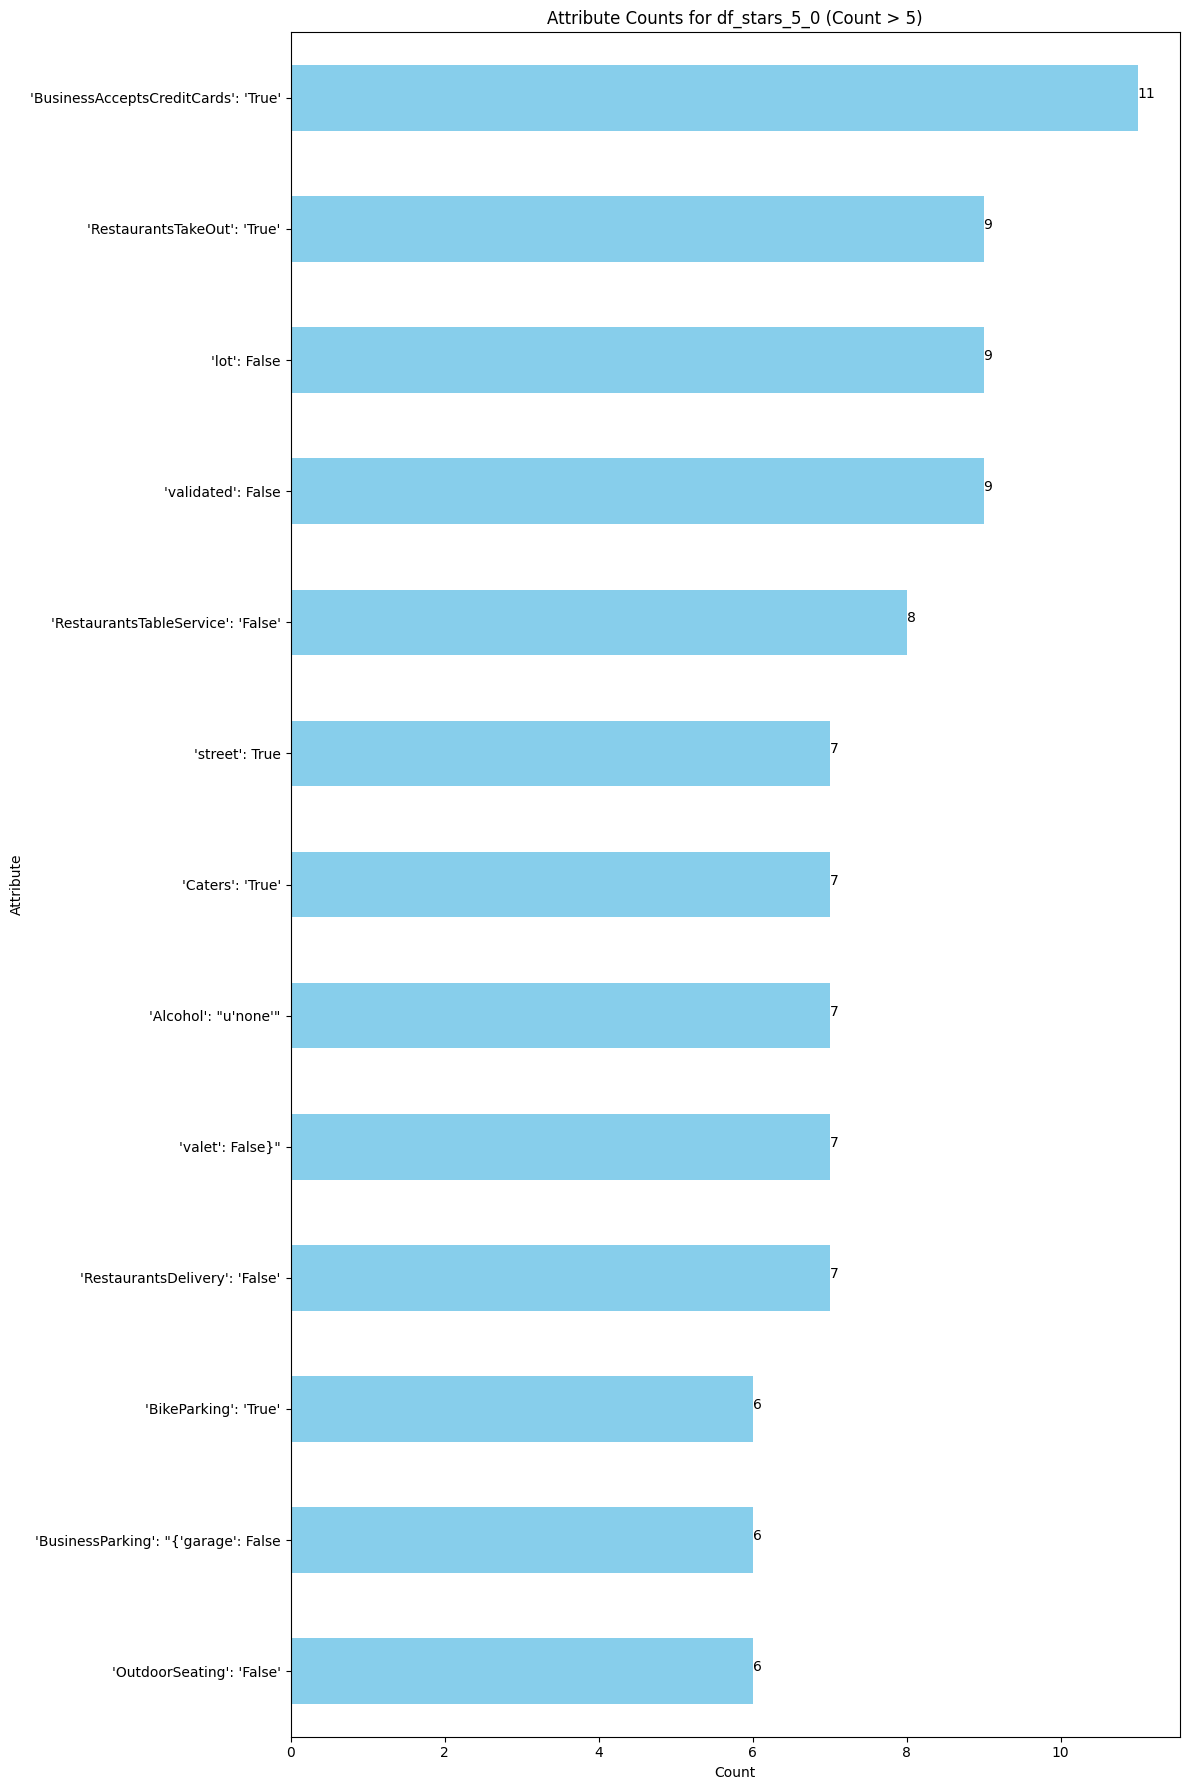

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os


star_ratings = df[df['stars'] >= 3.5]['stars'].unique() #Only star ratings 3.5 and above considered.

for star_value in star_ratings:
    variable_name = f"df_stars_{str(star_value).replace('.', '_')}"
    star_df = df[df['stars'] == star_value].copy()

    all_attribute_counts = summarize_attributes(star_df)

    min_count = 5
    filtered_attribute_counts = all_attribute_counts[all_attribute_counts > min_count]

    if not filtered_attribute_counts.empty:
        plt.figure(figsize=(12, 18))
        bar_plot = filtered_attribute_counts.sort_values().plot(kind='barh', color='skyblue')
        plt.title(f'Attribute Counts for {variable_name} (Count > {min_count})')
        plt.xlabel('Count')
        plt.ylabel('Attribute')

        for index, value in enumerate(filtered_attribute_counts.sort_values()):
            bar_plot.text(value, index, str(value))

        plt.tight_layout()
        plt.savefig(os.path.join(output_directory, f'{variable_name}_Counts.png'))
        plt.show()
    else:
        print(f'No attributes found for {variable_name} with count > {min_count}. Skipping plot.')


In [5]:
import pandas as pd

df = pd.read_csv('Philadelphia_Veg_data.csv')
column_names_list = list(df.columns)
#print(column_names_list)

unique_stars = df['stars'].unique()
#print(unique_stars)

grouped_by_stars = df.groupby('stars')
star_dataframes = {}
for star_value, group_df in grouped_by_stars:
    star_dataframes[star_value] = group_df

for star_value, star_df in star_dataframes.items():
    variable_name = f"df_stars_{str(star_value).replace('.', '_')}"
    globals()[variable_name] = star_df

In [6]:
#Tried splitting the attribiutes to TRUE and FALSE values
#No proper conclusions can be drawn
import ast

true_values_by_stars = {}
false_values_by_stars = {}

star_ratings = df[df['stars'] >= 3.5]['stars'].unique()

for star_value in star_ratings:
    variable_name = f"df_stars_{str(star_value).replace('.', '_')}"
    star_df = df[df['stars'] == star_value].copy()
    
    attributes_str = star_df['attributes'].iloc[0]
    attributes_dict = ast.literal_eval(attributes_str)
    true_values = {key: value for key, value in attributes_dict.items() if value == 'True'}
    false_values = {key: value for key, value in attributes_dict.items() if value == 'False'}
    
    true_values_by_stars[star_value] = true_values
    false_values_by_stars[star_value] = false_values
    
for star_value, true_values in true_values_by_stars.items():
    print(f"True Values for Stars {star_value}:\n{true_values}\n")

for star_value, false_values in false_values_by_stars.items():
    print(f"False Values for Stars {star_value}:\n{false_values}\n")

True Values for Stars 4.5:
{'BikeParking': 'True', 'OutdoorSeating': 'True', 'RestaurantsTakeOut': 'True', 'GoodForKids': 'True', 'HasTV': 'True'}

True Values for Stars 4.0:
{'BusinessAcceptsCreditCards': 'True', 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'RestaurantsTableService': 'True', 'HasTV': 'True', 'RestaurantsDelivery': 'True'}

True Values for Stars 3.5:
{'GoodForKids': 'True', 'RestaurantsDelivery': 'True', 'RestaurantsTakeOut': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsGoodForGroups': 'True'}

True Values for Stars 5.0:
{'WheelchairAccessible': 'True', 'DogsAllowed': 'True', 'RestaurantsTakeOut': 'True', 'BYOB': 'True', 'RestaurantsDelivery': 'True', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'Caters': 'True', 'OutdoorSeating': 'True'}

False Values for Stars 4.5:
{'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'False', 'Caters': 'False', 'BusinessAccepts

In [7]:
import pandas as pd

specific_star_ratings = [3.5, 4, 4.5, 5]

common_attributes_set = set()

for star_value in specific_star_ratings:
    variable_name = f"df_stars_{str(star_value).replace('.', '_')}"
    star_df = df[df['stars'] == star_value].copy()
    attribute_counts = summarize_attributes(star_df)

    filtered_attribute_counts = attribute_counts[attribute_counts >= 5]

    if not common_attributes_set:
        common_attributes_set.update(filtered_attribute_counts.index)
    else:
        common_attributes_set.intersection_update(filtered_attribute_counts.index)

common_attributes_list = list(common_attributes_set)

print(f'Common attributes among specific star ratings with count >= {5}:') #Common attributes among successfull restaurants
print(common_attributes_list)
print(len(common_attributes_list))

Common attributes among specific star ratings with count >= 5:
["'lot': False", "'BusinessAcceptsBitcoin': 'False'", "'hipster': False", "'RestaurantsReservations': 'False'", "'RestaurantsTakeOut': 'True'", "'trendy': False", "'divey': False", '\'Alcohol\': "u\'none\'"', "'BusinessAcceptsCreditCards': 'True'", "'validated': False", "'HasTV': 'False'", "'Caters': 'True'", "'BikeParking': 'True'", '\'valet\': False}"', '\'BusinessParking\': "{\'garage\': False', "'street': True", "'RestaurantsDelivery': 'False'", "'intimate': False", '\'WiFi\': "u\'free\'"', "'classy': False", "'RestaurantsDelivery': 'True'", "'upscale': False", "'OutdoorSeating': 'False'", "'RestaurantsTableService': 'False'"]
24


<Figure size 1000x600 with 0 Axes>

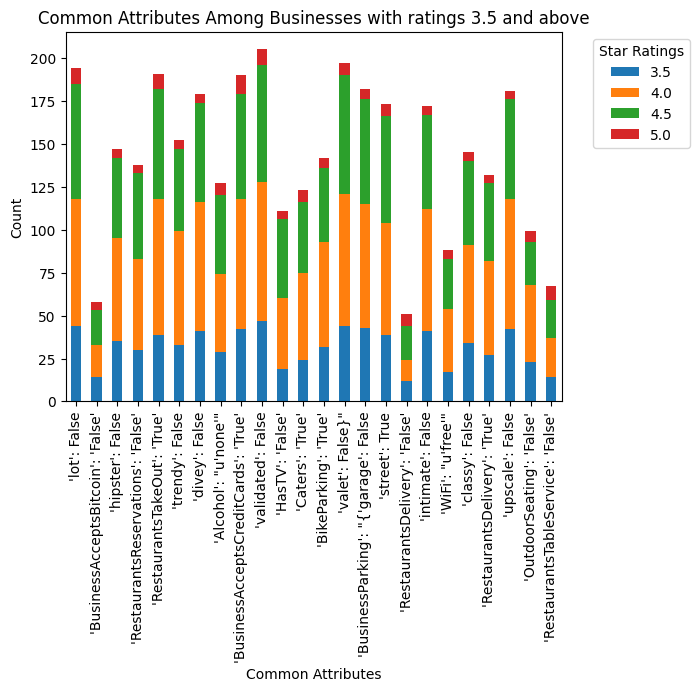

In [19]:
#Main plot for common attributes
df = pd.read_csv('Philadelphia_Veg_data.csv')
stars_column_name = 'stars'
specific_star_ratings = [3.5, 4, 4.5, 5]
counts_df = pd.DataFrame(index=common_attributes_list, columns=specific_star_ratings)

for star_value in specific_star_ratings:
    star_df = df[df['stars'] == star_value].copy()
    attribute_counts = summarize_attributes(star_df)
    counts_df[star_value] = attribute_counts

plt.figure(figsize=(10, 6))
counts_df.plot(kind='bar', stacked=True)
plt.legend(title='Star Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Common Attributes Among Businesses with ratings 3.5 and above')
plt.xlabel('Common Attributes')
plt.ylabel('Count')
plt.savefig('common_attributes_plot.png')
plt.show()


In [9]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_numeric_columns = df.select_dtypes(exclude='number').columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Non-Numeric Columns:", non_numeric_columns)

Numeric Columns: ['postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open']
Non-Numeric Columns: ['business_id', 'name', 'address', 'city', 'state', 'attributes', 'categories', 'hours']


In [10]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

#Did not end up using the results of the test
#Trying an ANOVA test to see which numeric column impacts the star ratings
unique_stars = df['stars'].unique()
columns_for_anova = ['postal_code', 'latitude', 'longitude', 'review_count', 'is_open']

for column in columns_for_anova:
    groups = [df[df['stars'] == star_value][column] for star_value in unique_stars]
    f_statistic, p_value = f_oneway(*groups)

    print(f"\nANOVA results for '{column}':")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("Statistically significant.")
    else:
        print("Statistically insignificant.")

    #Box plots, but not useful

    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x='stars', y=column, data=df)
    # plt.title(f'Boxplot for {column} across different star ratings')
    # plt.savefig(os.path.join(output_directory, f'{column}_boxplot.png'))
    # plt.show()


ANOVA results for 'postal_code':
F-statistic: 0.702045606714516
P-value: 0.6703311392428899
Statistically insignificant.

ANOVA results for 'latitude':
F-statistic: 1.585931988141616
P-value: 0.13953582409243132
Statistically insignificant.

ANOVA results for 'longitude':
F-statistic: 0.7993651171545401
P-value: 0.5884245059192623
Statistically insignificant.

ANOVA results for 'review_count':
F-statistic: 2.4670886875177533
P-value: 0.018104467931196733
Statistically significant.

ANOVA results for 'is_open':
F-statistic: 1.0495111793385672
P-value: 0.39682815441774233
Statistically insignificant.


In [11]:
#Getting the top vegetarian/vegam restaurants by review_count and stars
top_vegan_restaurants = df.sort_values(by=['review_count', 'stars'], ascending=False).head(10)
print(top_vegan_restaurants[['name', 'review_count', 'stars']])


                     name  review_count  stars
54                  Zahav          3065    4.5
33         Sabrina's Café          1721    4.0
273                 Vedge          1447    4.5
103        White Dog Cafe          1301    4.0
189        Sabrina's Café          1176    4.0
16             HipCityVeg          1082    4.0
34   Charlie Was a Sinner          1039    4.0
48         Sabrina's Café           833    4.0
47               V Street           739    4.5
155            Bar Bombón           734    4.0


In [12]:
filtered_restaurants = df[(df['stars'] >= 3.5) & (df['review_count'] > 10)]
sorted_filtered_restaurants = filtered_restaurants.sort_values(by='review_count', ascending=False)
print(sorted_filtered_restaurants[['name', 'review_count', 'stars']])


                             name  review_count  stars
54                          Zahav          3065    4.5
33                 Sabrina's Café          1721    4.0
273                         Vedge          1447    4.5
103                White Dog Cafe          1301    4.0
189                Sabrina's Café          1176    4.0
..                            ...           ...    ...
12         Yellow Bicycle Canteen            13    5.0
206                  Hip City Veg            13    4.0
195     Kurry Shack Francisville             13    4.0
264  Bombay Dhabba - Philadelphia            12    4.0
265                          Shai            11    4.5

[216 rows x 3 columns]


In [13]:
#Combined popularity score

weight_stars = 0.7
weight_review_count = 0.3

df['popularity_score'] = (weight_stars * df['stars']) + (weight_review_count * df['review_count'])

#Sort by the popularity
top_vegan_restaurants_score = df.sort_values(by='popularity_score', ascending=False).head(10)
print(top_vegan_restaurants_score[['name', 'popularity_score']])

print(df['popularity_score'].describe())


                     name  popularity_score
54                  Zahav            922.65
33         Sabrina's Café            519.10
273                 Vedge            437.25
103        White Dog Cafe            393.10
189        Sabrina's Café            355.60
16             HipCityVeg            327.40
34   Charlie Was a Sinner            314.50
48         Sabrina's Café            252.70
47               V Street            224.85
155            Bar Bombón            223.00
count    277.000000
mean      53.248736
std       88.005686
min        3.550000
25%        9.550000
50%       23.400000
75%       59.100000
max      922.650000
Name: popularity_score, dtype: float64


In [14]:
#For Shiny, to get the list of items per postal code 
import pandas as pd
from ast import literal_eval

df = pd.read_csv('shiny_df.csv')
df['good_item'] = df['good_item'].apply(literal_eval)
dish_keywords = ['udon noodle salad', 'burrito', 'vegpizza', 'home fries','toast', 'cake', 
                 'curry tofu wrap', 'spinach salad', 'vanilla ice cream','potato salad', 'coffee', 
                'beet salad', 'meat substitutes', 'brussel sprouts','spring roll', 'dessert', 'cake',
                  'chocolate chip cookie','Caesar salad']

df['filtered_item'] = df['good_item'].apply(lambda x: [item for item in x if item in dish_keywords])
df = df.drop('good_item', axis=1)
df.to_csv('filtered_file.csv', index=False)

#filtered_file = pd.read_csv("filtered_file.csv")

#def process_item(x):
    #return [item.strip() for item in x.strip("[]").split(',')]
#filtered_file['filtered_item'] = filtered_file['filtered_item'].apply(process_item)
#print(filtered_file)

In [15]:
#Filtering the csv for only businesses with star ratings >=3.5
#The csv is from the NER analysis
import pandas as pd

rest_items = pd.read_csv('rest&item_rcmd.csv')  

rest_items = rest_items[rest_items['rest_stars'] >= 3.5]
rest_items.to_csv('rest&item_rcmd.csv', index=False)  
aggregated_df = rest_items.groupby('business_id').agg({
    'name': 'first',
    'rest_stars': 'first',
    'review_count': 'first',
    'postal_code': 'first',
    'item': list,
    'item_ave_star': 'first'
}).reset_index()

aggregated_df.to_csv('aggregated_rest&item_rcmd.csv', index=False)

In [16]:
#Filtering the csv again for shiny to only include the postal codes that had more than 5 restaurants in the area.
import pandas as pd

df = pd.read_csv('aggregated_rest&item_rcmd.csv')
print(len(df))
valid_postal_codes = [19102, 19103, 19104, 19106, 19107, 19119, 19122, 19123, 19125, 19130, 19143, 19144, 19145, 19146, 19147, 19148]

filtered_df = df[df['postal_code'].astype(str).str.zfill(5).isin(map(str, valid_postal_codes))]
filtered_df.to_csv('aggregated_rest&item_rcmd.csv', index=False)

216


In [17]:
#Filtering the dish items from the items column
import pandas as pd
from ast import literal_eval

df = pd.read_csv('aggregated_rest&item_rcmd.csv')

unique_items = ['Tofu Spring Rolls', 'Mac and Cheese Ball', 'Greek salad',
                'PFried Noodles', 'kale salad', 'Coke', 'hot chocolate', 
                'papaysalad', 'fried rice', 'TortillCobb Salad', 'vegcheese steak',
                'Dumplings', 'Won Ton Soup', 'lentil soup', 'Apple Cider Fritters', 
                'frozen yogurt', 'Kataifi', 'Cauliflower 65', 'Waffles', 'Desert Rose', 
                'Hearts of Palm Ceviche', 'Waffle', 'Mezze', 'arugultaco salad', 'Carrot Choripan', 
                'Lillet Vive', 'Garlic Hummus', 'DDnoodles', 'Bubbly Byblos', 'hot and sour soup', 
                'red curry', 'Bronx Bomber', 'sandwich', 'Shichuan','Malai Kofta', 'sweet potato burrito', 
                'beet salad', 'pancake', 'fake meat', 'Falafel', 'Chocolate Uber Chunk', 'Dim Sum',
                'cucumber salad', 'Nachos', 'pie', 'cupcake', 'bananwhip', 'Tofu bmi', 'mi toast', 
                'Chocolate Filled Beignets', 'regular fries', 'Seattle Grunge', 'pineapple','Cream Corn Soup',
                'rice noodles', 'Sandwich', 'HDynasty', 'pasta', 'Lagos Brunch Bun', 'Shawarma', 'Make your own Bloody Mary', 
                'Desert Dog', 'brownie', 'iced coffee', 'capers', 'avocado toast', 'buffalo sauce', 'Palak Paneer',
                'Soup', 'gluten free bread', 'Kung Pao Green Beans', 'Mee goreng', 'taco', 'fried tofu', 'Yucatán', 'Pot de Creme',
                'udon noodle salad', 'grilled tofu', 'Saag Paneer', 'guacamole', 'Cookie Monster', 'Strawberry Lemonade', 
                'Salad,Buffallo Bella', 'Potato Custard', 'PeruviHome Fries', 'green lemonade', 'Pho French Dip', 'Thai Tea', 
                'faux meat', 'TikkMasala', 'Huevos Rancheros', 'BananWhip', 'mac and cheese ball', 'potato salad', 'sticky rice', 'Brie', 
                'Tres Leches', 'brussel sprouts', 'spring roll', 'romaine', 'Philly Cheese Steak', 'Coconut Soup', 'Bangkok Mule', 
                'Banh Mi Toast', 'pickle', 'Blood Hound', 'Piri Piri Tofu', 'salad dressing', 'spinach salad', 'Chocolate Chip BananPancakes', 
                'Cruz Control', "Mama's Meal", 'Caesar salad', 'meat substitutes', 'drunken noodles', 'bread basket', 'mock meat',
                'Summer Gold cocktail','Red Lentil Ful', 'Boston Cream', 'kale lemonade','Spring Roll', 'Fortune Cookies', 
                'Cubano', 'Konafi', 'cherry', 'melted cheese', 'jam', 'Cauliflower "65','bagel sandwiches','pickled cauliflower',
                'Mushroom DDNoodles', 'KF Tacos', 'Oreo', 'toast', 'Crispy Spring Roll', 'Tempeh Reuben', 'Toffee Pudding', 
                'cheese fries', 'Biryani', 'flat bread', 'Tacos', 'Daiya', 'cheese', "Charlie's Punch", 'cinnamon bun', 'taco salad',
                'Texam', 'Knob Creek', 'brunch spots', 'SamosChaat', 'Green Lemonade', 'Udon', 'burrito', 'Thai tea', 
                'Dan', 'Burrito', 'pepper', 'dairy', 'Rose Lemonade', 'ChanMasala', 'Southern Comfort', 'Tehina', 'mary', 
                'Caramelized Eggplant Bao Buns', 'Hummus', 'carrot','Toast', 'Sweet Potato Fries', 'Piri Piri', 'Kisi', 
                'Lemonnana', 'tea', 'Knickerbocker Glory', 'Arnold Palmer', 'FajitWrap', 'Fanta', 'Banh Mi Tofu', 'Crispy HipCity Ranch',
                'garlic naan', 'BK Breakfast', 'mozzarellsticks', 'curry tofu wrap', 'soda', 'Chicken & Waffles', 'Tofu', 'vanillice cream', 
                'ice cream', 'Reuben', 'Duck Sauce', 'Oolong Tea', 'rice pudding', 'Paneer TikkMasala', 'vegpizza', 'Stew', 
                'milkshake', 'Falafel Sandwich', 'arugulsalad', 'celery', 'fake chicken', 'bloody Maria', 'Tamarind Wings', 
                'Sweetened Oat Milk Thai Ice Tea', 'Imli Soda', 'Stateside', 'Crispy Hip City Ranch', 'Pad Kee Mao','Byblos Bubbles', 'white rice',
                'Strawberry Crumb Pancakes', 'pizza', 'Mac&Cheese', 'Korma', 'pico de gallo', 'Crispy Haloumi', 
                'hash browns', 'home fries', 'Fried Tempeh Tacos', 'Tempeh Tacos', 'appetizer', 'Fries', 'lunch buffet', 
                'chocolate chip cookie', 'Vedge', 'pad Thai', 'Boozy Mon', 'green tea', 'CreaCorn Soup', 'Po-boy Tacos', 
                'corn tortillas', 'Singapore Noodles', 'Pad Thai', 'broccoli rabe', 'Curry Tofu Wrap','Udon Noodle Salad', 'KFT Tacos', 
                'Hot Diggity', 'Verde Maria', 'Harvest Bowl', 'orange juice', 'lemonade', 'Banh mi sandwich', 'curry', 'sweet potato fries',
                'eggplant dish','artichoke', 'meat substitute', 'Mergheritas', 'breakfast burrito', 'cookie', 'fruit', 'Cobb salad', 
                'Margherita', 'cream', 'Spring rolls', 'waffle', 'chips']


df['item'] = df['item'].apply(literal_eval)

df_filtered = df[df['item'].apply(lambda x: any(item in x for item in unique_items))]
df_filtered.to_csv('aggregated_rest&item_rcmd.csv', index=False)


In [18]:
#Popularity score column based on ANOVA test results
#Didnt have to use it
import pandas as pd

weight_stars = 0.7
weight_review_count = 0.3

df = pd.read_csv('aggregated_rest&item_rcmd.csv')
df['popularity_score'] = (weight_stars * df['rest_stars']) + (weight_review_count * df['review_count'])

#print(df[['business_id', 'name', 'rest_stars', 'review_count', 'postal_code', 'item', 'item_ave_star', 'popularity_score']])
df.to_csv('aggregated_rest&item_rcmd_pop.csv', index=False)
df.describe()


,rest_stars,review_count,postal_code,item_ave_star,popularity_score
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,4.112821,218.076923,19123.384615,4.460842,68.302051
std,0.403068,334.754948,18.727585,0.465859,100.414385
min,3.500000,11.000000,19102.000000,4.000000,6.400000
25%,4.000000,45.500000,19104.000000,4.000000,16.675000
50%,4.000000,100.000000,19123.000000,4.380952,32.800000
75%,4.500000,264.000000,19145.000000,5.000000,81.825000
max,5.000000,3065.000000,19148.000000,5.000000,922.650000
